# Business Case: 
## Predicting the price range of the Flight Fare considering the different features given in the data

# Tasks :
## Task 1:-Prepare a complete data analysis report on the given data.
## Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

## Importing Libraries:

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

In [216]:
# Loading Dataset

In [217]:
df= pd.read_excel("C:\Capstone Projects\Flight_Fare.xlsx")

In [218]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Domain Analysis:
Airline:

      This column indicates the different types of Airlines available for the passengers to travel.
      
Date of Journey:
         
      This column indicates the date of journey where the customers had made their Journey.
      
Source:

      This column indicates the place where the passengers had boarded in their Airlines.
      
Destination:

     This column indicates the destination of the passengers.
Route:

     This column indicates the routes travelled by the Airline to reach to the Destination. 
    
Dep_Time:

     This column indicates the departure time of the Airlines. 
     
Arrival_Time:

     This column indicates the Arrival time of the Airlines in the destination.
     
Duration:
  
     This column indicates the time taken for the Airline to reach the destination point. 
     
Total_stops:

     This column indicates the total number of stops of the Airlines. 
     
Price:

     This column indicates the price for a ticket in an Airline.
## Task 1:-Prepared a complete data analysis report on the given data.

## EDA

In [219]:
!pip install sweetviz

In [6]:
import sweetviz as sv  # univarite analysis

my_report = sv.analyze(df)  # pass the original datafarame

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [220]:
# Basic Checks

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [222]:
# There are no missing values in this data

In [223]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [224]:
df.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [225]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [226]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [227]:
df1=df.copy()

In [228]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [229]:
# There are two null values present in this data, so we need to remove both the null values.

In [230]:
df1.dropna(inplace=True) # Dropping the null values

In [231]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [232]:
df1[df1.duplicated()]  # check the duplicate values

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


Now we saw duplicates in our dataset, it is less than 10% we leave it more than that we will drop the duplicates because these are similar data points already lie in dataset, it can replicate more times it affects the our training model i.e we removing the duplicates.Retaining duplicates can enhance the accuracy and effectiveness of your flight fare prediction model.

In [233]:
df1.drop_duplicates(keep='first',inplace=True)
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [234]:
df1.shape

(10462, 11)

In [235]:
df1["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [236]:
df1["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [237]:
import warnings
warnings.filterwarnings('ignore')

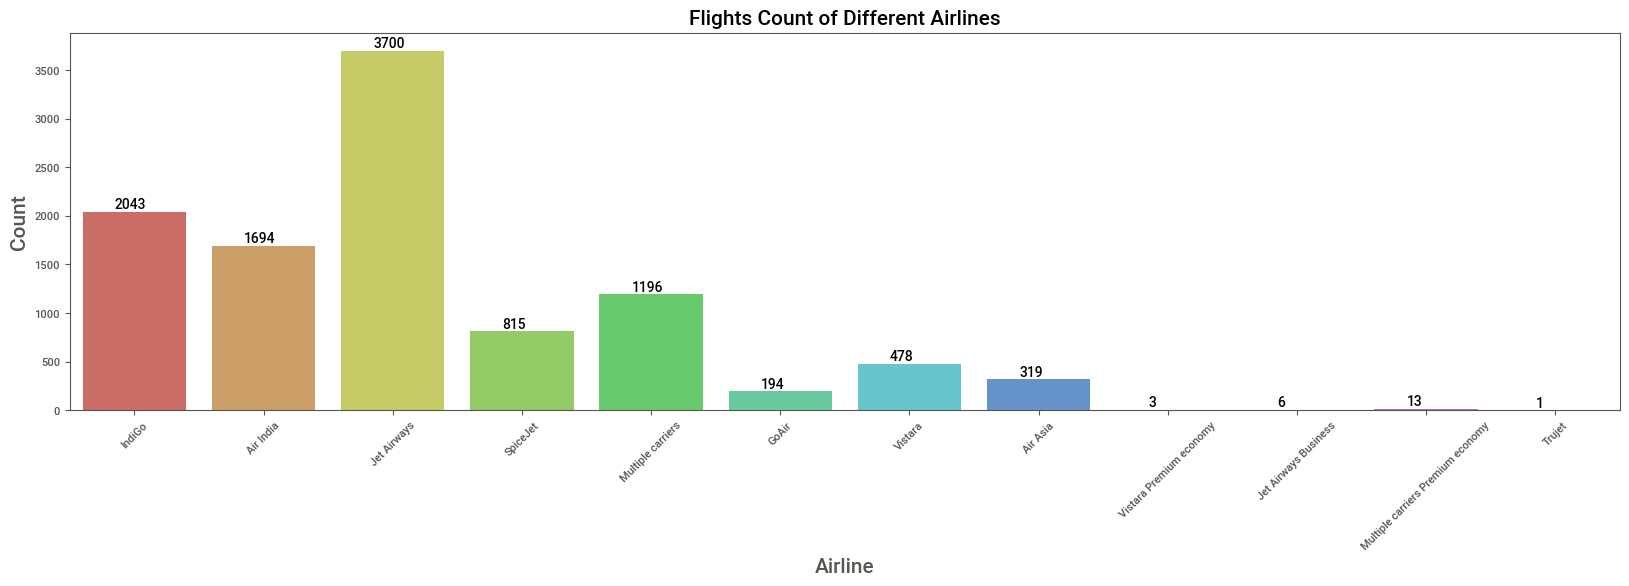

In [238]:
plt.figure(figsize=(20,5))
ax=sns.countplot(df1['Airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

The above countplot shows Flights from of different Airlines, The Jet Airways has most no of flights are like the people for  travelling, after that
Indigo, AirIndia, Multiple carriers ,the least one was Trujet.
Insights:
    * Jet Airways has the highest number of occurances.
    * Trujet has the least number of occurances, followed by Vistara Premium economy.

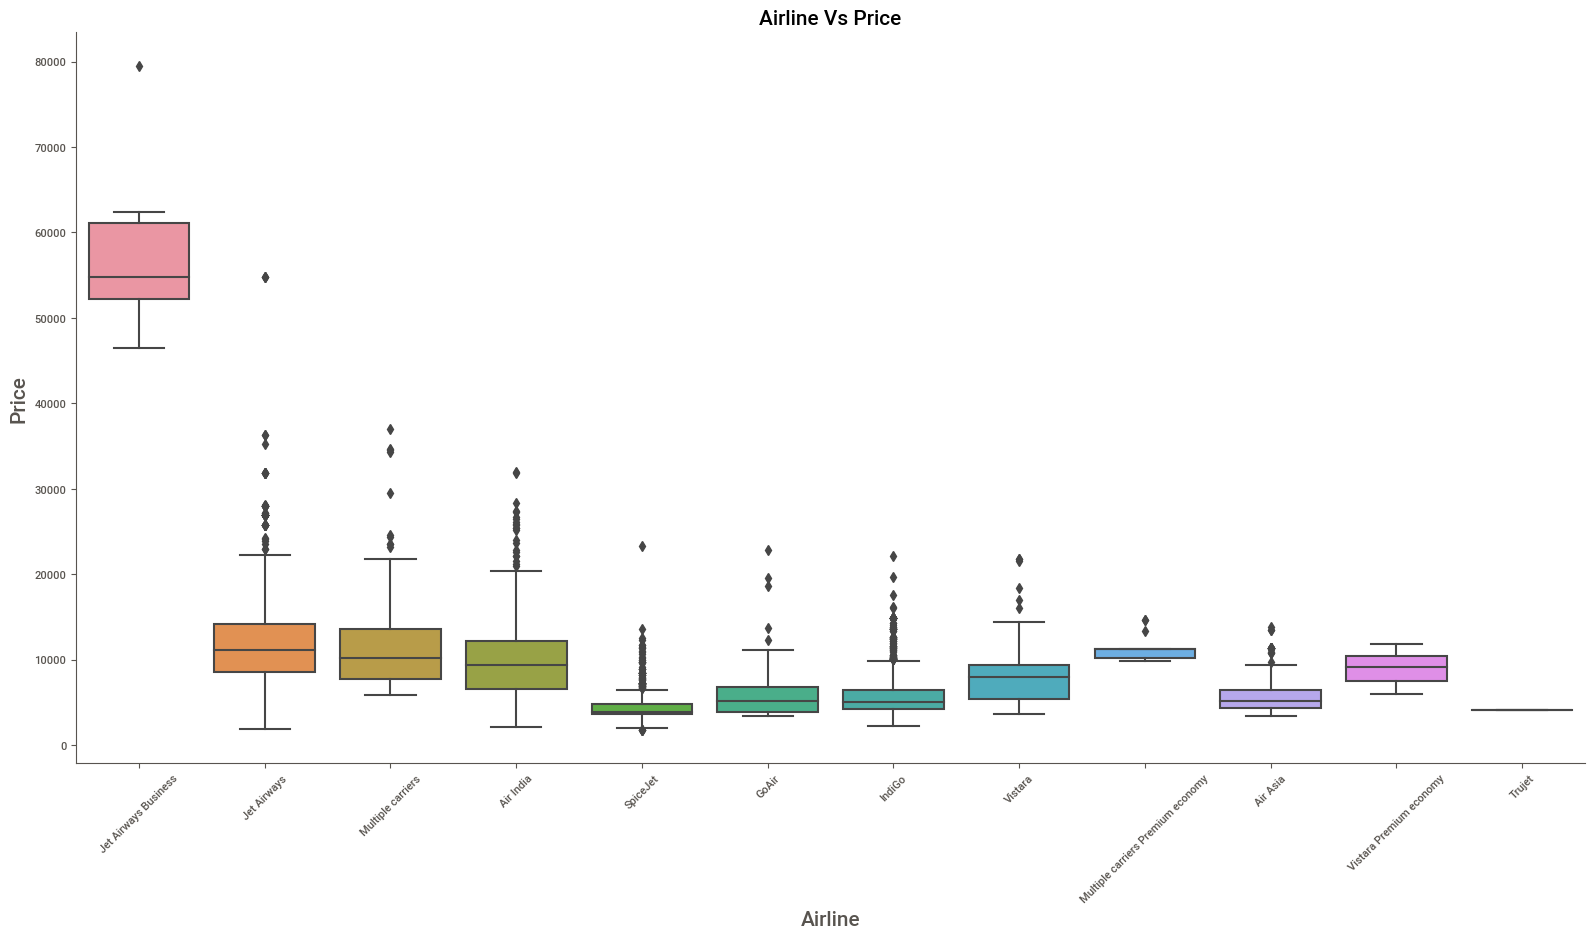

In [239]:
sns.catplot(y = "Price", x = "Airline", data = df1.sort_values("Price", ascending = False), kind="box", height = 8, aspect = 2)
plt.title("Airline Vs Price",fontsize=15)
plt.xlabel("Airline",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.xticks(rotation=45)
plt.show()

Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price.

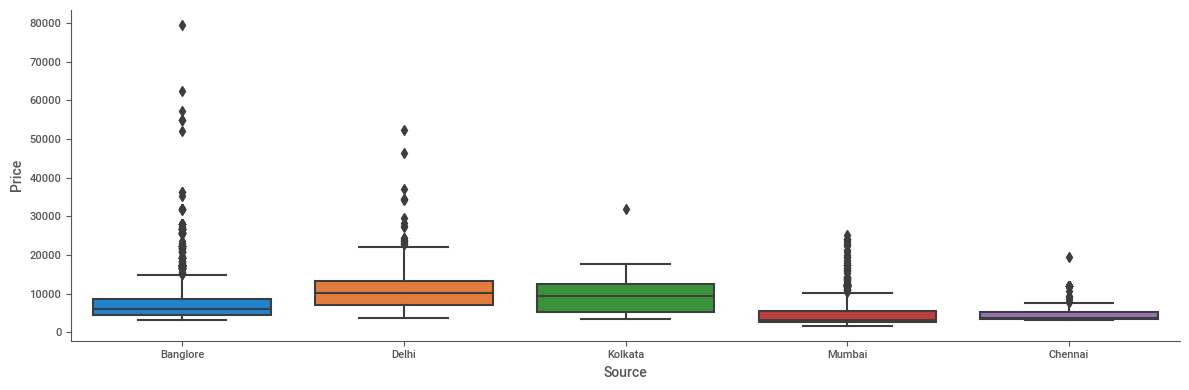

In [240]:
sns.catplot(y = "Price", x = "Source", data = df1.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

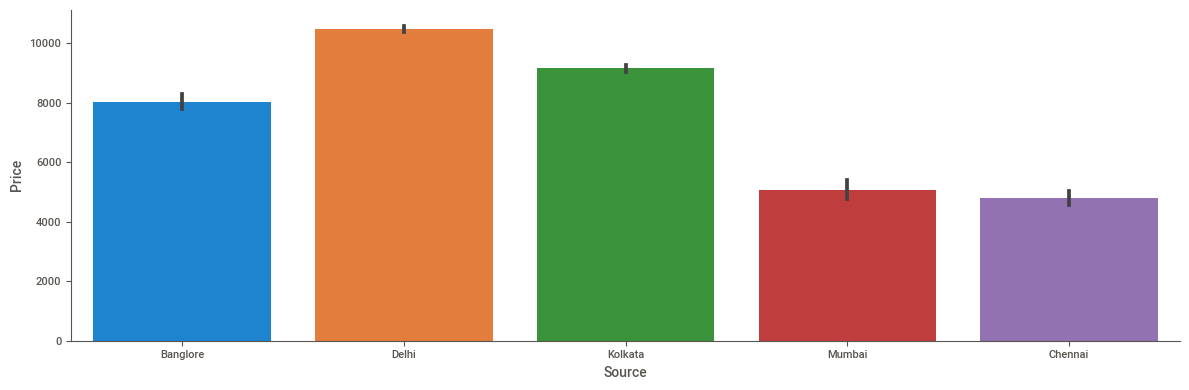

In [241]:
sns.catplot(y = "Price", x = "Source", data = df1.sort_values("Price", ascending = False), kind="bar", height = 4, aspect = 3)
plt.show()

Now with the help of cat plot only we are plotting a bar plot between the price of the flight and the source place i.e. the place from where passengers will travel from the source and we can see that Delhi as the source location has the most  while Chennai has the least.

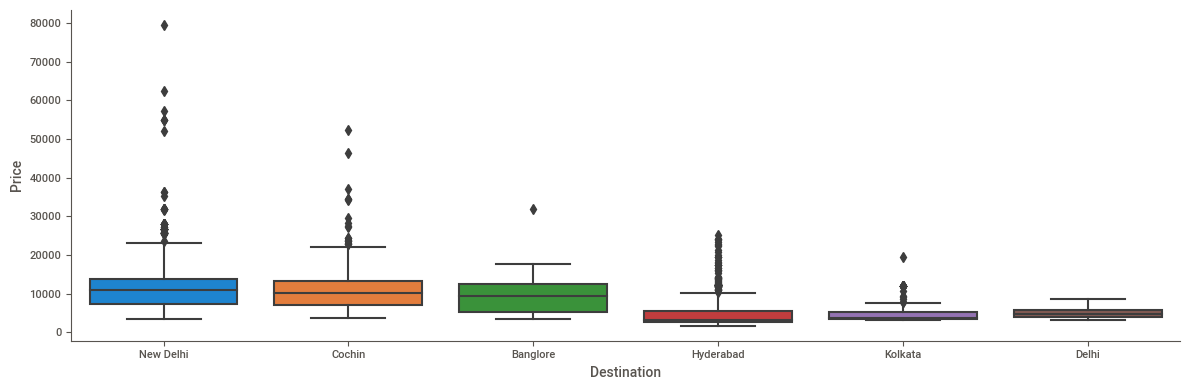

In [242]:
sns.catplot(y = "Price", x = "Destination", data = df1.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that New Delhi has the most outliers and Kolkata has the least.

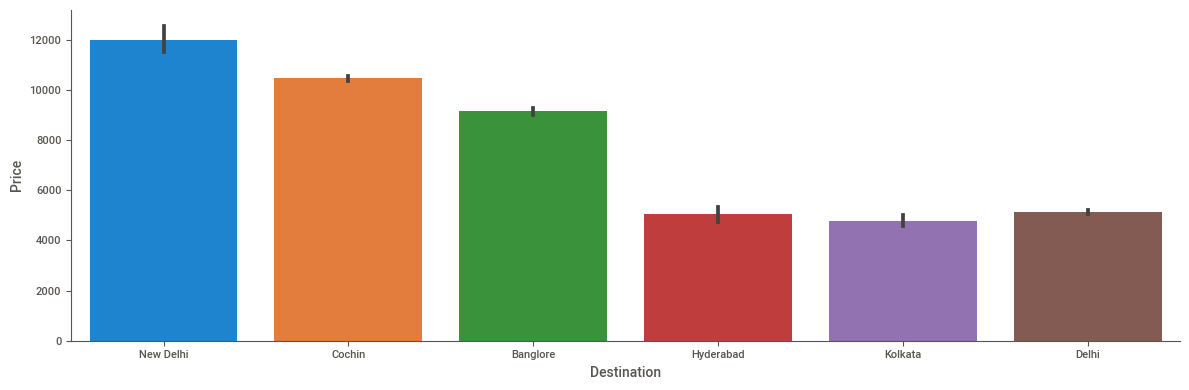

In [243]:
sns.catplot(y = "Price", x = "Destination", data = df1.sort_values("Price", ascending = False), kind="bar",height = 4, aspect = 3)
plt.show()

Here we are plotting the bar plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that New Delhi has the most and Kolkata has the least.

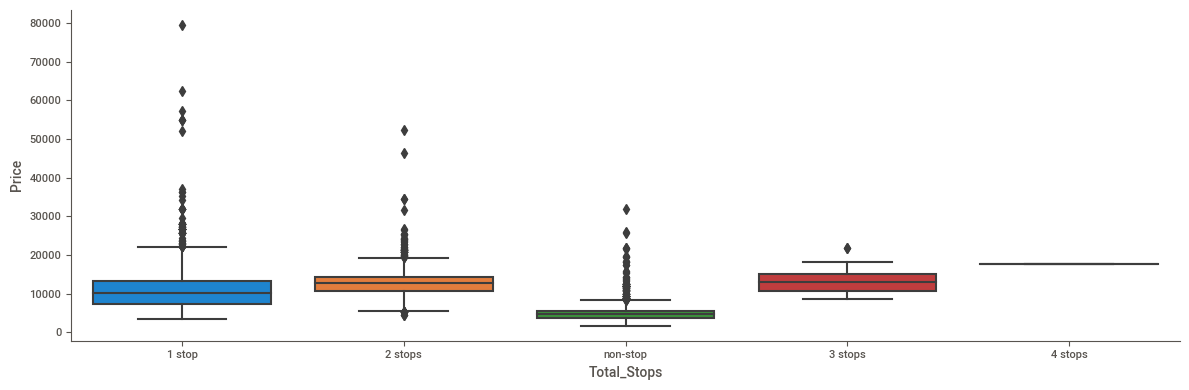

In [244]:
sns.catplot(y = "Price", x = "Total_Stops", data = df1.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Here we are plotting the box plot with the help of a cat plot between the price of the flight and the Total_Stops to which the passenger is travelling and figured out that 1 stop has the most outliers and 4 stops has the least.

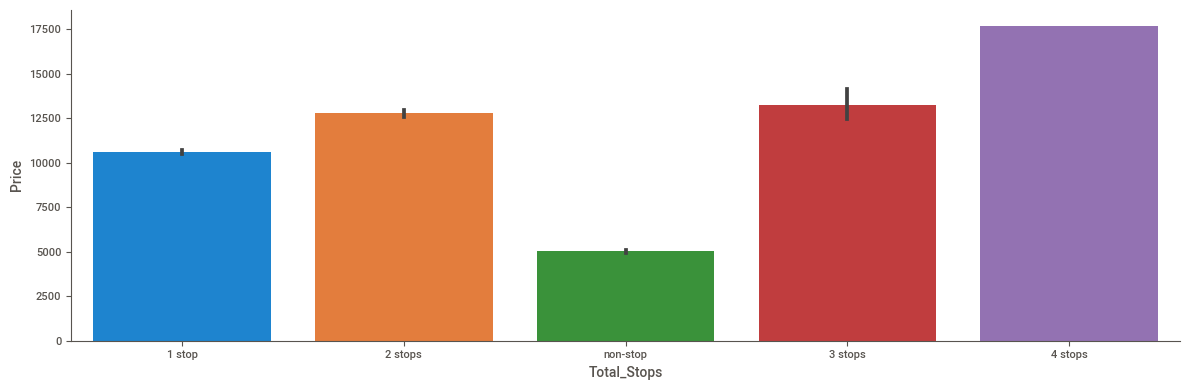

In [245]:
sns.catplot(y = "Price", x = "Total_Stops", data = df1.sort_values("Price", ascending = False), kind="bar", height = 4, aspect = 3)
plt.show()

Here we are plotting the bar plot with the help of a cat plot between the price of the flight and the Total_Stops to which the passenger is travelling and figured out that 4stops has the most  non-stops has the least.

## Data preprocessing

### Handling object date Date of Journey , Dep_time, Arrival_time, Duration are object datatypes . Now we want to convert into numerical data by using pandas "to_datetime method"

In [246]:
df1["Journey_day"] = pd.to_datetime(df1['Date_of_Journey']).dt.day
#df1["Journey_day"] = pd.to_datetime(df1.Date_of_Journey, format="%d/%m/%y").dt.day
df1["Journey_month"] =pd.to_datetime( df1['Date_of_Journey']).dt.month

For Date of Journey, we extract the journey day and journey month using pandas to_datetime method, to convert object to datetime data type, and then use dt.day and dt.month attributes to extract journey day and journey month, and store them in two new columns within our dataframe.

In [247]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [248]:
df1.drop(["Date_of_Journey"], axis=1, inplace=True)  #now we have converted the date of jouney into day & month drop the date of journry column

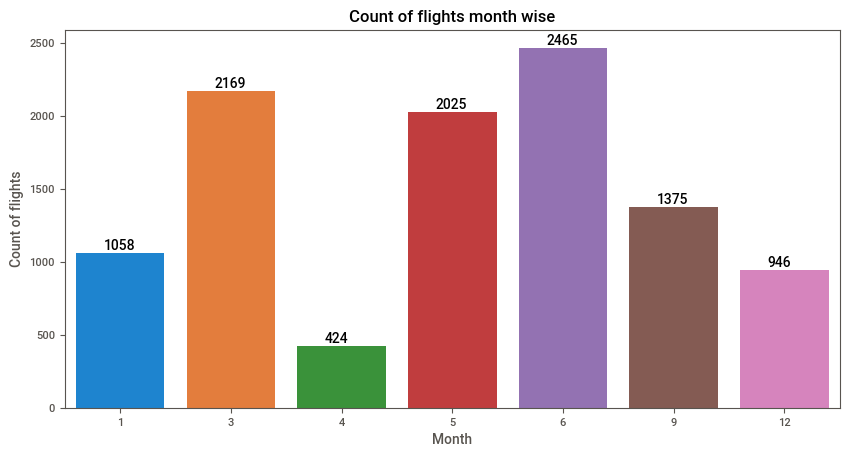

In [249]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df1)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

Now we see the above countplot ,it shows most of the flights travelling in 5th month , least in 4th month

Then we do exactly the same thing for Departure Time and Arrival Time, where we are extracting hour and minute values and creating new columns in our dmata frame for storing them. And then dropping the original features.

In [250]:
df1["Dep_hour"] = pd.to_datetime(df1["Dep_Time"]).dt.hour # extracting hour
df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute # extracting minutes 

In [251]:
df1.drop(["Dep_Time"], axis=1, inplace=True)

In [252]:
df1.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [253]:
# similar to do for arrival time
df1["Arrival_hour"] = pd.to_datetime(df1["Arrival_Time"]).dt.hour
df1["Arrival_min"] = pd.to_datetime(df1["Arrival_Time"]).dt.minute
df1.drop(["Arrival_Time"], axis=1, inplace=True)

In [254]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Now Duration, This feature is represented in the format "xh ym". However, some values also have only hours or only minutes, missing the other half. To fix this, we first standardise the Duration feature format conerting total minutesmin.

In [255]:
df1['Duration_min']=pd.to_timedelta(df1['Duration']).dt.total_seconds()

In [256]:
df1['Duration_min'] = df1['Duration_min']/60
df1

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25,150.0
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,155.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20,180.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10,160.0


In [257]:
df1.drop('Duration',axis=1,inplace=True)

Now Check if the length (len) of the Duration value split is 2 or not. In case it is not 2, we check if it has the minutes part missing or the hours. And, we add " 0m“ as suffix and “0h “ as prefix, respectively. Finally, we are extract duration_hours and duration_mins from the now standardized duration values and add them to the data frame

Now we successfully changed object features to numerical data

## Feature Engineering 
Categorical Variables like Airline, Source, Destination, Route, Total_Stops and Additional_info.
### 1.Nominal data ==> data is not in order (ranking) ==> OnehotEncoder is used in this case
### 2.Ordinal data ==> data is in order ==> LabelEncoder is used in this case

In [258]:
df1["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

If we check for the value_counts, we get a bunch of carriers, off which many have low value counts, like: Truejet, Vistara Premium Economy, Jet Airways Business, etc. So, we are going to define a new category, called "Other", where we put all these carriers having value count in double digits or less.

In [259]:
# for airline we perform OnehotEncoding
# As Airline is Nominal Categorical data we will perform OneHotEncoding
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = df1[["Airline"]]
Current_Airline_List = Airline['Airline']
New_Airline_List = []
for i in Current_Airline_List:
  if i in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(i)
  else:
    New_Airline_List.append('Other')
Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

Jet Airways          3619
IndiGo               2009
Air India            1667
Multiple carriers    1169
SpiceJet              797
Vistara               471
Air Asia              310
GoAir                 189
Other                  22
Name: Airline, dtype: int64

we perform OneHotEncoding on the data frame Airline using Pandas get_dummies method.

In [260]:
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


 we have our Airline dataframe transformed to OneHotEncoding representation.

Now, let’s move to the next feamture, which is Source. Here the value counts, which look fairly distributed. So, we may directly perform the OneHotEncoding here.

In [261]:
# similar to source also
# Feature engineering on: Source
print(df1["Source"].value_counts())
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = df1[["Source"]]
Source = pd.get_dummies(Source, drop_first= True) 
# drop_first= True means we drop the first column to prevent multicollinearity
Source.head()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


 we have our Source dataframe transformed to OneHotEncoding representation.

We have Destination. Here are the value counts. If you go through these values, you will find a minor issue. We have two labels Delhi and New Delhi, which are basically the Same City.

So, we need to merge them into one. For this, we apply a similar logic to what we applied for the Airline feature. Basically, we define a new data frame Destination, having a single column destination from the main data frame, viz., dataset. Then, we loop through Destination and replace all New Delhi with Delhi. And finally, we perform OneHotEncoding.

In [262]:
#Feature engineering on: Destination
print(df1["Destination"].value_counts())
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination = df1[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)
    
Destination['Destination'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


 we have our Destination dataframe transformed to OneHotEncoding representation.

Now moving on, for the next couple of features Route and Additional_Info, we are actually going to drop them.

Route is a redundant feature, as we have Total_Stops that also captures similar information on Stoppages

For Additional_Info, 80% of the observations say no_info, so doesn’t add much value.

In [263]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df1.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

Now Total_Stops is Ordinal Data, which follows an order. Like 0 stops is better than 1 stop than 2 stop, etc. So, for this, we perform LabelEncoding. To do this, first let’s check for value counts. Then, as part of LabelEncoding, we assign keys to Total_Stops categories starting from 0 till 4 and replace the original values with these keys.

In [264]:
# Feature engineering on: Total_Stops
print(df1["Total_Stops"].value_counts())
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df1.head()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,285.0


In [265]:
df1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True) # Now we are these columns we creates into new dataframes 

Well, with this we have completed the never ending Feature Engineering part. As a final step, let’s concatenate the new data frames that we created: Airline, Source, Destination with the main dataset, and we are now calling it final_data 

In [270]:
# Concating the dataframe --> df1,Airline,Destination,Source
final_data = pd.concat([df1, Airline, Source, Destination], axis=1)
final_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,170.0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,50,13,15,445.0,1,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,1140.0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,5,12,18,5,23,30,325.0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,285.0,0,...,0,0,0,0,0,0,0,1,0,0


In [271]:
df1

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,0,3897,24,3,22,20,1,10,170.0
1,2,7662,5,1,5,50,13,15,445.0
2,2,13882,6,9,9,25,4,25,1140.0
3,1,6218,5,12,18,5,23,30,325.0
4,1,13302,3,1,16,50,21,35,285.0
...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,19,55,22,25,150.0
10679,0,4145,27,4,20,45,23,20,155.0
10680,0,7229,27,4,8,20,11,20,180.0
10681,0,12648,3,1,11,30,14,10,160.0


In [272]:
final_data.shape

(10462, 25)

In [273]:
final_data.loc[final_data["Price"]>55000]

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
2924,1,79512,3,1,5,45,11,25,340.0,0,...,0,0,0,0,0,0,1,0,0,0
5372,1,62427,3,1,5,45,12,25,400.0,0,...,0,1,0,0,0,0,0,1,0,0
10364,1,57209,3,1,9,45,14,25,280.0,0,...,0,0,0,0,0,0,1,0,0,0


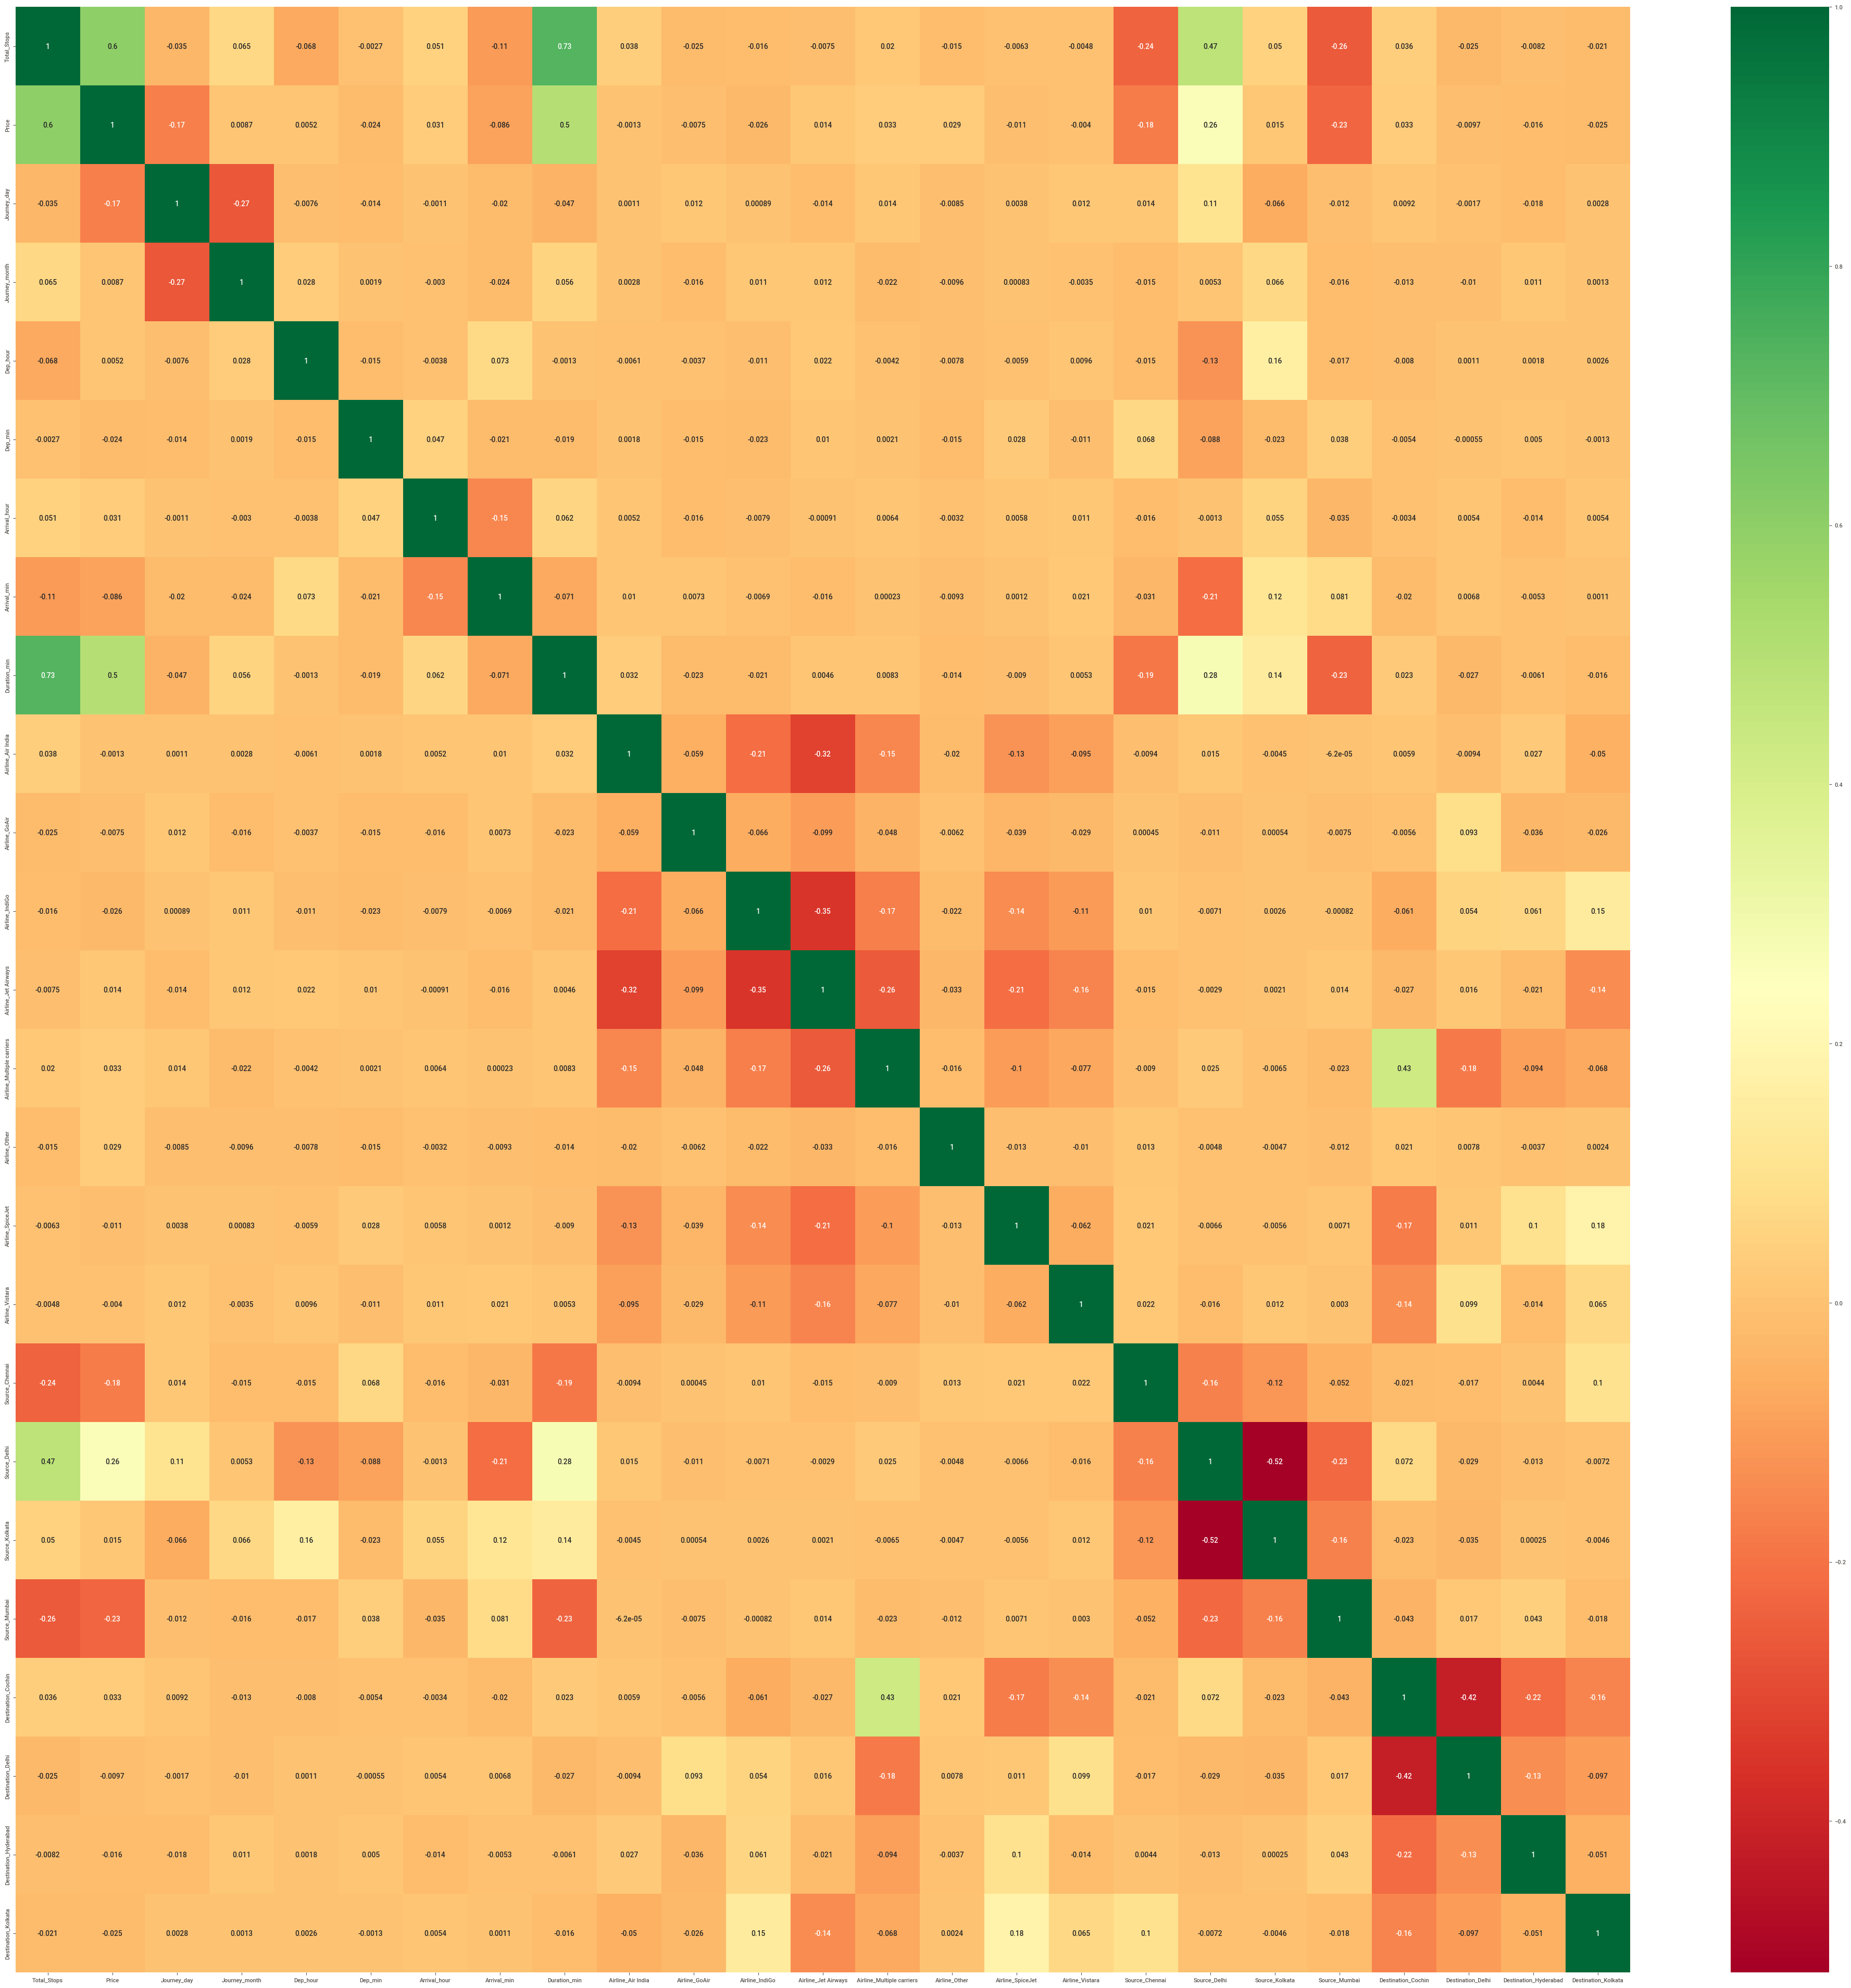

In [274]:
plt.figure(figsize = (50,50))
sns.heatmap(final_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

### By Creating the heatmap there is no correlation or multicolinearity between the features

## DATA ANALYSIS:
Summary:
     The dataset contains 10,683 records with features including Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, and Additional_Info, which provide information about travel journeys.

* The dataset consists of Date_of_Journey with 12 unique dates, Source with 5 unique sources, Destination with 5 unique destinations, Route with 6 unique routes, Dep_Time with 128 unique departure times, Arrival_Time with 222 unique arrival times, Duration with 1,343 unique durations, and Total_Stops with 5 unique values, along with Additional_Info containing 10 unique additional information categories.

* Jet Airways is the most frequently occurring airline with 3700 instances, followed by IndiGo with 2,043 instances, indicating their prevalence.

* Airlines like Jet Airways Business and Vistara Premium Economy are relatively rare, each appearing only a few times.

* Delhi is the most frequently chosen departure city in the flight prediction dataset, with 4,345 occurrences.

* Kolkata follows as the second most common departure city, appearing 2,860 times.

* Bangalore is also a popular starting point for flights, with 2,179 instances.

* Cochin is the most frequently selected destination in the dataset, with 4,345 occurrences.

* Banglore is the second most common destination, appearing 2,860 times.

* Delhi and New Delhi together account for 2,179 instances as destinations.

* "1 stop" flights are the most prevalent in the dataset, with 5,625 occurrences.

* "Non-stop" flights are the second most common, appearing 3,475 times.

* "No info" is the most common additional information in the dataset, with 8,345 occurrences.

* "In-flight meal not included" is the second most frequent, appearing 1,982 times.

* When visualizing 'Date_of_Journey,' 'Dep_Time,' 'Arrival_Time,' and 'Duration,' it's evident that they overlap significantly, making it challenging to discern clear distributions due to their time-related nature.

* The prices for Jet Airways Business appear significantly higher in comparison to other options.

* Delhi appears to have a higher price range compared to other airports.

* Data for flights with 4 stops is limited, and it typically indicates long-distance journeys, which tend to be more costly.

* There is no correaltion between features.

## Feature Selection

In [275]:
final_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

Now to check for the relative importance of features and for multicollinearity, we are using: sklearn feature_importance_ and Variable Inflation Factor or VIF.

To proceed further, let’s first define our X and y. X is all the columns barring Price. And Y is the target variable Price. Then, we compute feature importance coefficients for all 25 input features and plot them on a graph.

(10462, 24) (10462,)
[0.23776176 0.11596635 0.08748281 0.04721524 0.04655434 0.05633301
 0.04642829 0.20624794 0.00802227 0.00201669 0.01115757 0.01071896
 0.00876035 0.00347552 0.00801501 0.00617102 0.001373   0.03551976
 0.02489381 0.00554558 0.01179009 0.00947158 0.00588261 0.00319642]


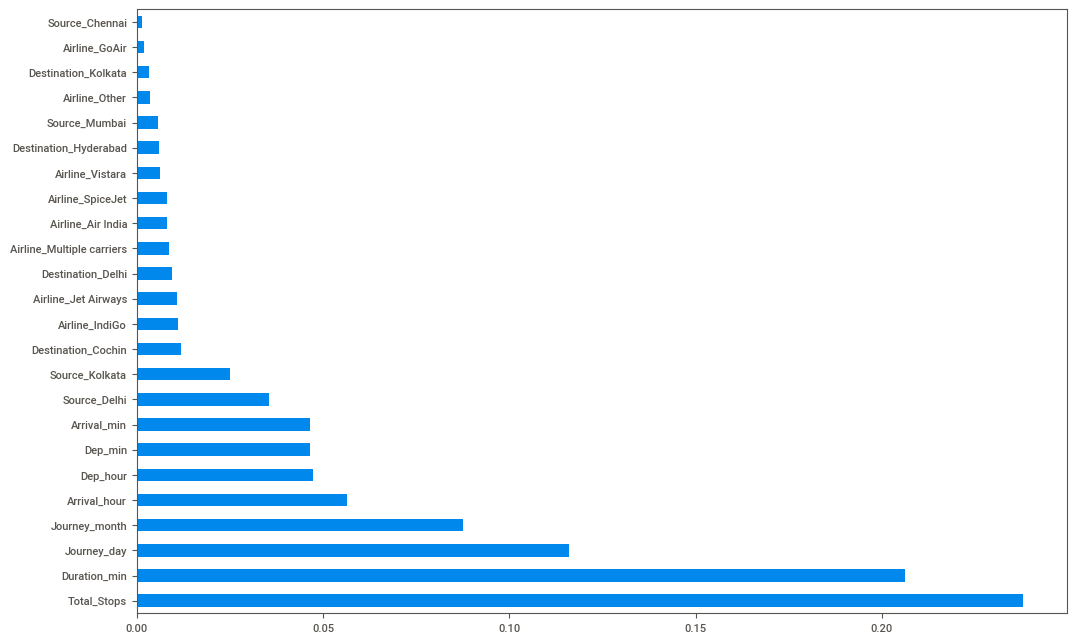

In [276]:

X = final_data.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y = final_data.iloc[:, 1]
print(X.shape, y.shape)

# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

# Plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

Insights:
      So, here we have all our features listed in the ascending order of their importance in predicting Price.
      Here the Total_stops,Duration_min,Journey_day,Journey_month has more feature importance

Now, let’s also check for multicollinearity, before we make a decision on feature selections. For this, we have written a function calc_vif. Then we call it on our X.

In [277]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

# Compute VIF on X
calc_vif(X)

,variables,VIF
0,Total_Stops,6.839491
1,Journey_day,3.122928
2,Journey_month,4.318261
3,Dep_hour,5.424400
4,Dep_min,2.639051
5,Arrival_hour,4.501583
6,Arrival_min,3.172231
7,Duration_min,5.647402
8,Airline_Air India,3.126602
9,Airline_GoAir,1.250079


As a rule of thumb, VIF value > 10 is generally a sign of multicollinearity. Here, we are getting high VIF values for journey_month. And if we look at the feature importance on these variables

Now, if we compute VIF values again, we may still find some VIF values over 10. On the other hand, their feature importance is high too. Hence, it’s a trade-off we have to make to prevent overfitting at the cost of reduced model performance. So, I leave this part to you on doing further permutations in selecting your final feature set.

### Splitting the data into training dataset & test dataset

In [282]:
# Split data into 80:20 Training Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Linear Regression 

In [283]:
# importing train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [284]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

In [285]:
from sklearn import metrics
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('R2_SCORE:', metrics.r2_score(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
# RMSE = sqrt((PV-OV)^2/n)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, lr_pred))/(max(y_test)-min(y_test)),2))
# RMSE/(max(DV)-min(DV))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 2476.9407848166247
MSE: 11999747.20944843
R2_SCORE: 0.42448018472489635
RMSE: 3464.0651277723446
Normalized RMSE  0.07
Max Value:  79512 
Min Value:  1759


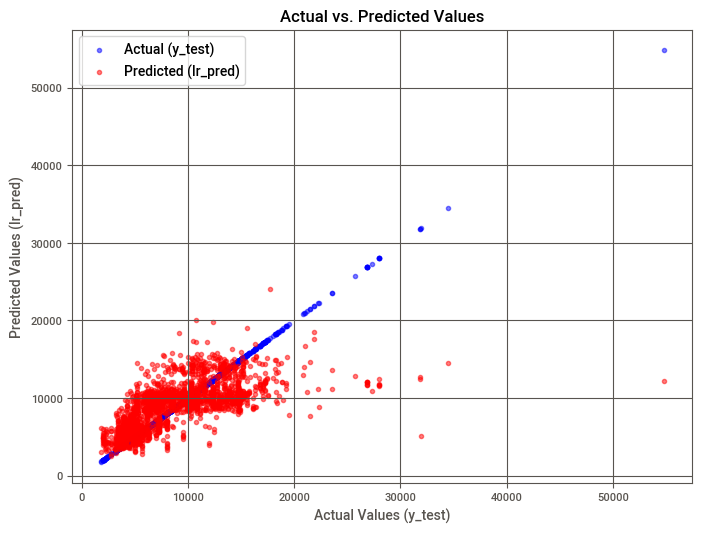

In [286]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, lr_pred, c='red', marker='o', alpha=0.5, label='Predicted (lr_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (lr_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

The above graph shows realation between the y_test, lr_pred

In [287]:
from sklearn.metrics import r2_score
lr_r2_score=r2_score(y_test,lr_pred)
print("lr_r2_score:",lr_r2_score)

# adjusted r2_score
adj_r2_lr=1-(1-lr_r2_score)*(3205-1)/(3205-25-1)
print("adj_r2_lr:",adj_r2_lr)

lr_r2_score: 0.42448018472489635
adj_r2_lr: 0.4199542346204995


Insights:
   Our linear model's prediction R-squared (R2) score is 44%. so our linear regression model accounts for approximately
44% of the variance in the flight fares.

## KNN Regressor

In [288]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)

KNN.fit(X_train,y_train)

y_predict=KNN.predict(X_test)

In [289]:
from sklearn import metrics
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('R2_SCORE:', metrics.r2_score(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
# RMSE = sqrt((PV-OV)^2/n)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict))/(max(y_test)-min(y_test)),2))
# RMSE/(max(DV)-min(DV))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 1956.7157190635453
MSE: 10315706.921662686
R2_SCORE: 0.5052484324575779
RMSE: 3211.807422879318
Normalized RMSE  0.06
Max Value:  79512 
Min Value:  1759


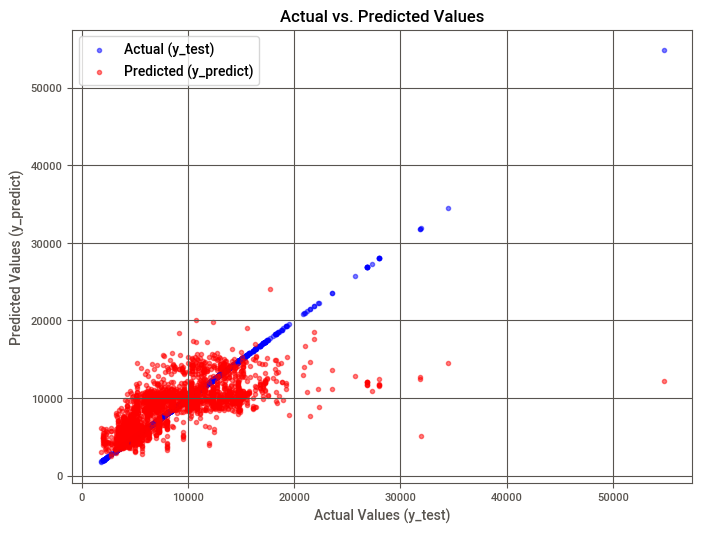

In [290]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, lr_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_predict)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_predict)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [291]:
from sklearn.metrics import r2_score
knn_r2_score=r2_score(y_test,y_predict)
print("knn_r2_score:",knn_r2_score)

# adjusted r2_score
adj_r2_knn=1-(1-knn_r2_score)*(3205-1)/(3205-25-1)
print("adj_r2_knn:",adj_r2_knn)

knn_r2_score: 0.5052484324575779
adj_r2_knn: 0.5013576525932935


Insights:
   Our KNN model's prediction R-squared (R2) score is 54%. so our KNN model accounts for approximately
54% of the variance in the flight fares.

## SVM Regressor

In [292]:
from sklearn.svm import SVR
SVM=SVR()

SVM.fit(X_train,y_train)

y_hat = SVM.predict(X_test)

In [293]:
from sklearn import metrics
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_hat))
print('MSE:', metrics.mean_squared_error(y_test, y_hat))
print('R2_SCORE:', metrics.r2_score(y_test, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
# RMSE = sqrt((PV-OV)^2/n)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_hat))/(max(y_test)-min(y_test)),2))
# RMSE/(max(DV)-min(DV))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 3051.3846311147036
MSE: 17419953.8598074
R2_SCORE: 0.1645216809564769
RMSE: 4173.721823481699
Normalized RMSE  0.08
Max Value:  79512 
Min Value:  1759


In [294]:
from sklearn.model_selection import cross_val_score

# performing Cross Validation

scores = cross_val_score(SVM, X, y, cv=5, scoring='r2')

print("Cross-validation R2 scores:", scores)
print("Mean R2 Score:", scores.mean())
print("Standard Deviation of R2 Score:", scores.std())

Cross-validation R2 scores: [0.14188111 0.1352999  0.15470224 0.16612161 0.15194771]
Mean R2 Score: 0.14999051389991389
Standard Deviation of R2 Score: 0.010656641323119713


In [296]:
# Hyperparametric Tunning for SVM:

#We use GridSearch CV
from sklearn.model_selection import RandomizedSearchCV
#defining Hyperparameter
param_grid={'C':[0.001,0.01,0.1,1,2],'kernel':['linear','rbf'],'epsilon': [0.01, 0.1, 0.2, 0.5, 1.0]}
model=SVR()
grid=RandomizedSearchCV(model,param_grid,verbose=2,scoring='r2',n_jobs=-1,n_iter=100,cv=3,random_state=42)
grid.fit(X,y)
print(grid.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'kernel': 'linear', 'epsilon': 0.01, 'C': 2}


In [298]:
svr=SVR(kernel='linear',epsilon=0.01,C=2)

svr.fit(X_train,y_train)

y_pred1=svr.predict(X_test)

In [299]:
from sklearn import metrics
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
# RMSE = sqrt((PV-OV)^2/n)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred1))/(max(y_test)-min(y_test)),2))
# RMSE/(max(DV)-min(DV))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 2430.565388901289
MSE: 13785295.971117543
R2_SCORE: 0.3388434895892384
RMSE: 3712.8555009746265
Normalized RMSE  0.07
Max Value:  79512 
Min Value:  1759


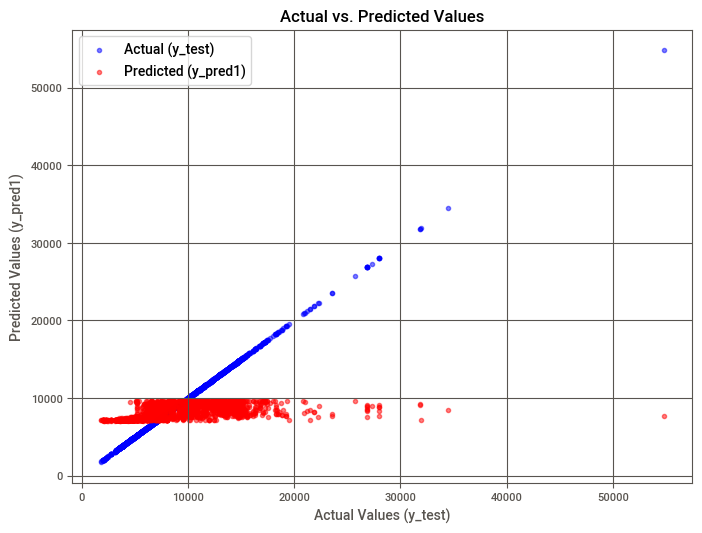

In [300]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_hat, c='red', marker='o', alpha=0.5, label='Predicted (y_pred1)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred1)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [301]:
from sklearn.metrics import r2_score
svr_r2_score=r2_score(y_test,y_pred1)
print("svr_r2_score:",svr_r2_score)

# adjusted r2_score
adj_r2_svr=1-(1-svr_r2_score)*(3205-1)/(3205-25-1)
print("adj_r2_svr:",adj_r2_svr)

svr_r2_score: 0.3388434895892384
adj_r2_svr: 0.3336440832475369


Insights:
    Our Support Vector Regressor (SVR) model had an initial R-squared (R2) score of 0.9% before hyperparameter tuning.
After tuning, the model's score is 33%, signifying that the tuned SVR model explains approximately 41% of the variance in flight fares.

## Decision Tree Regressor

In [302]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

dt.fit(X_train,y_train)
y_pred2=dt.predict(X_test)

In [303]:
from sklearn import metrics
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
# RMSE = sqrt((PV-OV)^2/n)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))/(max(y_test)-min(y_test)),2))
# RMSE/(max(DV)-min(DV))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 1520.6528905876733
MSE: 7187366.543119923
R2_SCORE: 0.6552867495447038
RMSE: 2680.92643373889
Normalized RMSE  0.05
Max Value:  79512 
Min Value:  1759


In [304]:
# Hyper parameter tuning

In [222]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, scoring='r2', cv=5, verbose=2 ,n_jobs=-1)
grid_search.fit(X, y)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Hyperparameters:
{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [305]:
dt1=DecisionTreeRegressor(max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=10)
dt1.fit(X_train,y_train)

y_hat1=dt1.predict(X_test)

In [306]:
from sklearn import metrics
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_hat1))
print('MSE:', metrics.mean_squared_error(y_test, y_hat1))
print('R2_SCORE:', metrics.r2_score(y_test, y_hat1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat1)))
# RMSE = sqrt((PV-OV)^2/n)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_hat1))/(max(y_test)-min(y_test)),2))
# RMSE/(max(DV)-min(DV))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 1422.852946907381
MSE: 6211004.947011309
R2_SCORE: 0.7021140231219081
RMSE: 2492.188786390652
Normalized RMSE  0.05
Max Value:  79512 
Min Value:  1759


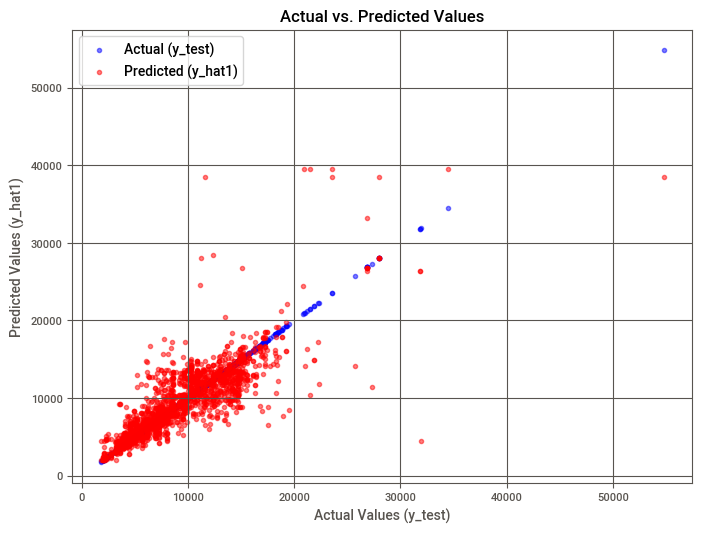

In [307]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_hat1, c='red', marker='o', alpha=0.5, label='Predicted (y_hat1)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_hat1)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [308]:
from sklearn.metrics import r2_score
dt_r2_score=r2_score(y_test,y_hat1)
print("dt_r2_score:",dt_r2_score)

# adjusted r2_score
adj_r2_dt=1-(1-dt_r2_score)*(3205-1)/(3205-25-1)
print("adj_r2_dt:",adj_r2_dt)

dt_r2_score: 0.7021140231219081
adj_r2_dt: 0.6997714155654587


Insights:
     Our DecisionTree Regressor  model had an initial R-squared (R2) score of 64% before hyperparameter tuning.
After tuning, the model's score improved to 70%, signifying that the tuned DecisionTree model explains approximately 70% of the variance in flight fares, marking a substantial improvement in predictive performance compared to the original model.

## Random Forest Regressor

In [335]:
# Model training
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

In [336]:
from sklearn import metrics
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('R2_SCORE:', metrics.r2_score(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
# RMSE = sqrt((PV-OV)^2/n)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, rf_pred))/(max(y_test)-min(y_test)),2))
# RMSE/(max(DV)-min(DV))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 1296.6511269765433
MSE: 4462121.7123308135
R2_SCORE: 0.7859922031029436
RMSE: 2112.3734784196695
Normalized RMSE  0.04
Max Value:  79512 
Min Value:  1759


In [337]:
# Model R2 on Training & Test
print('Model Performance on Training Set:', round(rf_reg.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(rf_reg.score(X_test, y_test)*100,2))

Model Performance on Training Set: 96.27
Model Performance on Test Set: 78.6


Our normalized RMSE is 0.06. It’s values lie on a scale of 0 to 1, and a value approaching 0 is considered good. So, in our case, the model is actually doing a fair job.

Insights:
   Our Random Forest model's predicted R-squared (R2) score is 78%. so our Random Forest model accounts for approximately
78% of the variance in the flight fares.

In [234]:
# # Hyper Parametric tunning for Random Forest Regressor:

#initializie the libraries and parameters
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=100,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [235]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

rf_ht=RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_ht, param_distributions=random_grid, n_iter=100, cv=3, verbose=1,
                            random_state=42, n_jobs=-1, scoring='r2')

rf_cv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=1)

In [236]:
rf_best_params=rf_cv.best_params_
print(f"best_params:{rf_best_params}")

best_params:{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 82, 'bootstrap': False}


In [338]:
rfr1=RandomForestRegressor(n_estimators=800,max_features='sqrt',max_depth=82,min_samples_split=5,
                           min_samples_leaf=1,random_state=42,bootstrap=False)

In [339]:
rfr1.fit(X_train,y_train)

y_hat3=rfr1.predict(X_test)

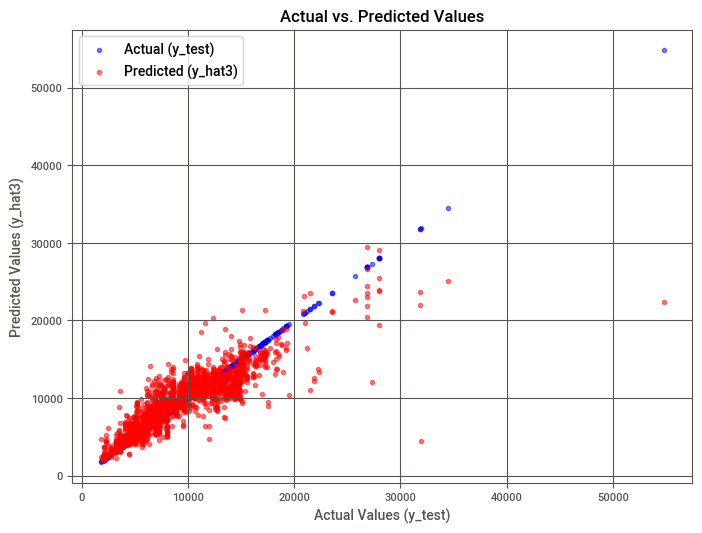

In [340]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_hat3, c='red', marker='o', alpha=0.5, label='Predicted (y_hat3)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_hat3)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [341]:
from sklearn import metrics
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_hat3))
print('MSE:', metrics.mean_squared_error(y_test, y_hat3))
print('R2_SCORE:', metrics.r2_score(y_test, y_hat3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat3)))
# RMSE = sqrt((PV-OV)^2/n)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_hat3))/(max(y_test)-min(y_test)),2))
# RMSE/(max(DV)-min(DV))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 1413.2414940177578
MSE: 4731823.553472078
R2_SCORE: 0.7730570344628276
RMSE: 2175.275512083947
Normalized RMSE  0.04
Max Value:  79512 
Min Value:  1759


In [342]:
from sklearn.metrics import r2_score
rf_r2_score=r2_score(y_test,rf_pred)
print("rf_r2_score:",rf_r2_score)

# adjusted r2_score
adj_r2_rf=1-(1-rf_r2_score)*(3205-1)/(3205-25-1)
print("adj_r2_rf:",adj_r2_rf)

rf_r2_score: 0.7859922031029436
adj_r2_rf: 0.7843092226303339


In [343]:
#Adjust_r2_score
#adj_r2=1-(1-rf_r2_score)*(3205-1)/(3205-28-1)
#adj_r2

Insights:
     Our RandomForest Regressor  model had an initial R-squared (R2) score of 79% before hyperparameter tuning.
After tuning, the model's score improved to 77%, signifying that the tuned RandomForest model explains approximately 77% of the variance in flight fares, marking a substantial improvement in predictive performance compared to theoriginal model.

## Gradient Boosting Regressor

In [318]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()

GB.fit(X_train,y_train)
y_pre=GB.predict(X_test)

In [319]:
from sklearn import metrics
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_pre))
print('MSE:', metrics.mean_squared_error(y_test, y_pre))
print('R2_SCORE:', metrics.r2_score(y_test, y_pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pre)))
# RMSE = sqrt((PV-OV)^2/n)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pre))/(max(y_test)-min(y_test)),2))
# RMSE/(max(DV)-min(DV))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 1703.0736080603122
MSE: 6177877.679851372
R2_SCORE: 0.7037028398147668
RMSE: 2485.5336810937347
Normalized RMSE  0.05
Max Value:  79512 
Min Value:  1759


In [320]:
#R2_Score
#gb_r2_score=r2_score(y_test,y_pre)
#gb_r2_score

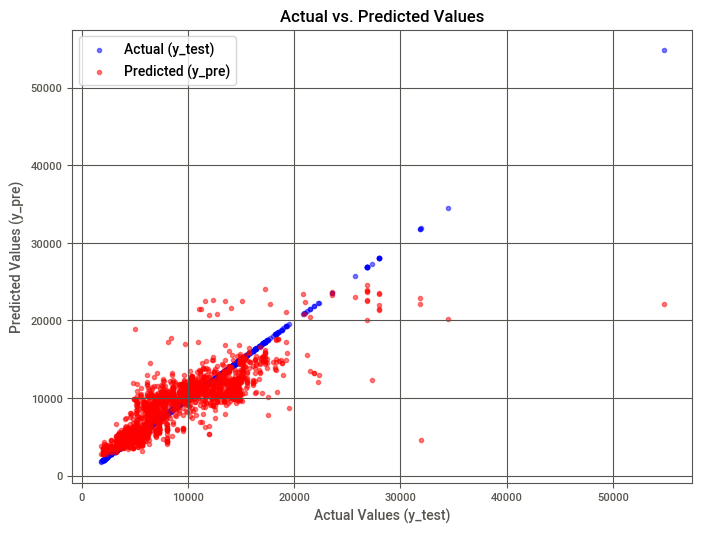

In [321]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pre, c='red', marker='o', alpha=0.5, label='Predicted (y_pre)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pre)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [322]:
from sklearn.metrics import r2_score
gb_r2_score=r2_score(y_test,y_pre)
print("gb_r2_score:",gb_r2_score)

# adjusted r2_score
adj_r2_gb=1-(1-gb_r2_score)*(3205-1)/(3205-25-1)
print("adj_r2_gb:",adj_r2_gb)

gb_r2_score: 0.7037028398147668
adj_r2_gb: 0.7013727268847162


Insights:
     Our Gradient Boosting  Regressor  model's prediction R-squared (R2) score is 70%. so our  Gradient Boosting Regressor model accounts for approximately 70% of the variance in the flight fares.

## XG Boost Regressor

In [344]:
import xgboost
from xgboost import XGBRegressor
xgb=XGBRegressor()

xgb.fit(X_train,y_train)

y_pre2 = xgb.predict(X_test)

In [345]:
xg_r2_score=r2_score(y_test,y_pre2)
xg_r2_score

0.7753159193300021

In [250]:
#Hyper Parameter tuning

from sklearn.model_selection import RandomizedSearchCV
param_grid={ 'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
xbg2=XGBRegressor(random_state=42)
xgb_cv=RandomizedSearchCV(estimator=xbg2,param_distributions=param_grid,n_iter=100,cv=3,verbose=1,
                          random_state=42,n_jobs=-1,scoring='r2')
xgb_cv.fit(X,y)
cv_best_params=xgb_cv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 25.6, 'reg_alpha': 200, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 200})


In [346]:
xgb2=XGBRegressor(reg_lambda=25.6,reg_alpha=200,n_estimators=100,max_depth=8,learning_rate=0.2,gamma=200,random_state=42)

xgb2.fit(X_train,y_train)

y_pre3=xgb2.predict(X_test)

In [347]:
#R2_Score
xgb_r2_score=r2_score(y_test,y_pre3)
xgb_r2_score

0.7843222337059729

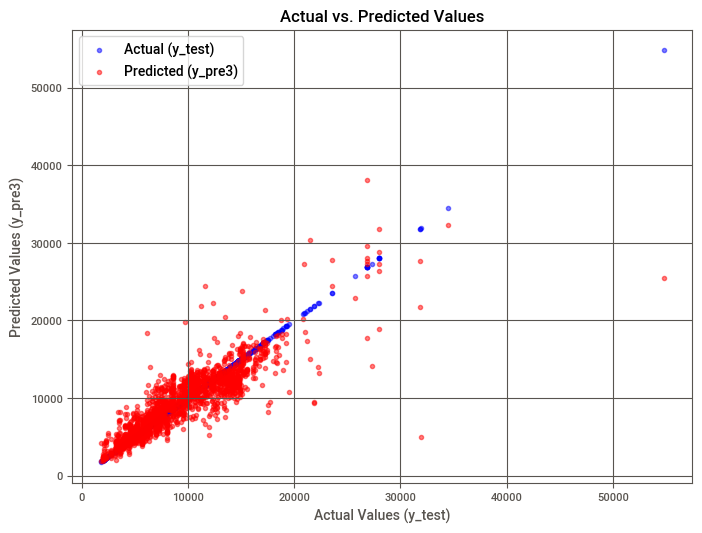

In [348]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pre3, c='red', marker='o', alpha=0.5, label='Predicted (y_pre3)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pre3)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


In [349]:
from sklearn.metrics import r2_score
xgb_r2_score=r2_score(y_test,y_pre2)
print("xgb_r2_score:",xgb_r2_score)

# adjusted r2_score
adj_r2_xgb=1-(1-xgb_r2_score)*(3205-1)/(3205-25-1)
print("adj_r2_xgb:",adj_r2_xgb)

xgb_r2_score: 0.7753159193300021
adj_r2_xgb: 0.7735489794065199


Insights:
     Our XG Boosting Regressor  model had an initial R-squared (R2) score of 78% before hyperparameter tuning.
After tuning, the model's score improved to 73%, signifying that the tuned XG Boosting model explains approximately 73% of the variance in flight fares, marking a substantial improvement in predictive performance compared to the original model.

## Lasso & Ridge Regressors

In [350]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)
#Predicting for X_test
y_pred_lasso =lasso_reg.predict(X_test)

In [351]:
from sklearn.metrics import r2_score
lasso_r2_score=r2_score(y_test,y_pred_lasso)
print("lasso_r2_score:",lasso_r2_score)

# adjusted r2_score
adj_r2_lasso=1-(1-lasso_r2_score)*(3205-1)/(3205-25-1)
print("adj_r2_lasso:",adj_r2_lasso)

lasso_r2_score: 0.4251861861915034
adj_r2_lasso: 0.42066578815903644


In [352]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
#Fitting the Training data to the Lasso regressor
ridge_reg.fit(X_train,y_train)
#Predicting for X_test
y_pred_ridge=ridge_reg.predict(X_test)

In [353]:
from sklearn.metrics import r2_score
ridge_r2_score=r2_score(y_test,y_pred_ridge)
print("ridge_r2_score:",ridge_r2_score)

# adjusted r2_score
adj_r2_ridge=1-(1-ridge_r2_score)*(3205-1)/(3205-25-1)
print("adj_r2_ridge:",adj_r2_ridge)

ridge_r2_score: 0.424717075745066
adj_r2_ridge: 0.4201929885772857


Insights:
     Our Lasso & Ridge Regressor  model's prediction R-squared (R2) score is 44%. so our Lasso & Ridge model accounts for approximately 44% of the variance in the flight fares.

In [354]:
# # Final Report:

scores=[lr_r2_score,knn_r2_score,svr_r2_score,dt_r2_score,rf_r2_score,gb_r2_score,xgb_r2_score,lasso_r2_score,ridge_r2_score]
algorithms=['LinearRegression','KNN','SVM','DecisionTree','RandomForest','GradientBoosting','XGBoosting','Lasso Regression','Ridge Regression']
for i in range(len(algorithms)):
    print("The R2 Score acheived using " + algorithms[i] + ' is: ' + str(scores[i])+"%")

The R2 Score acheived using LinearRegression is: 0.42448018472489635%
The R2 Score acheived using KNN is: 0.5052484324575779%
The R2 Score acheived using SVM is: 0.3388434895892384%
The R2 Score acheived using DecisionTree is: 0.7021140231219081%
The R2 Score acheived using RandomForest is: 0.7859922031029436%
The R2 Score acheived using GradientBoosting is: 0.7037028398147668%
The R2 Score acheived using XGBoosting is: 0.7753159193300021%
The R2 Score acheived using Lasso Regression is: 0.4251861861915034%
The R2 Score acheived using Ridge Regression is: 0.424717075745066%


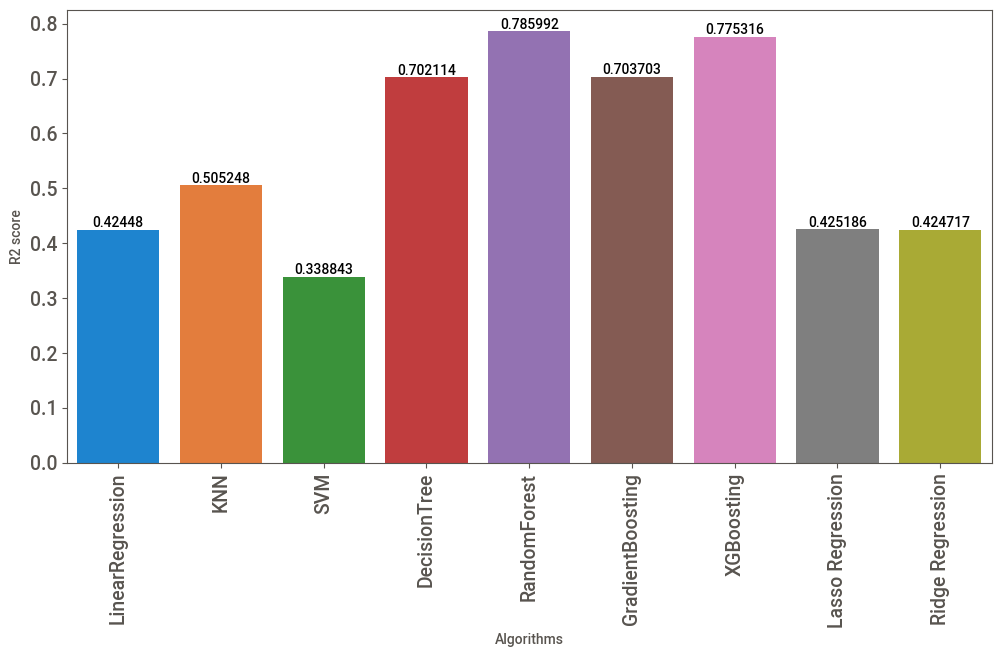

In [355]:
# plotting the barplot between algoriths and their r2_scores
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.tick_params(labelsize=14)


## Summary:

## After trying various models, the Random Forest model & XG Boost model achieved an R2 score of 78%, indicating that it is the superior model.

## Conclusion:
Summarize by stating that your Random Forest model, with an 78% R2 score, is a promising solution for your problem. It outperforms other models you've tried and provides valuable insights into the relationship between your features and target variable. However, remember to use this model responsibly and consider its interpretability and practicality in real-world applications.
## Challenges Faced in Data and Techniques:
Data Quality and Preprocessing:

 Inaccurate or incomplete data is a common challenge. Cleaning and preprocessing the data involves handling missing
 values, outliers, and ensuring consistency in data formats.Feature Engineering:

Creating meaningful features from the raw data can be challenging. Feature selection and extraction techniques
are often used to improve model performance.Categorical Variables:

Handling categorical variables like airline names, departure/arrival locations, and class types requires encoding
or feature engineering to make them suitable for machine learning models.
## Techniques used for Flight Fare Prediction: 
Model Selection:

 Choosing the right machine learning algorithm or ensemble of algorithms can be challenging. Common choices
 for regression tasks like flight fare prediction include XGBoost, Random Forest, and Linear Regression.Cross-Validation:

  Cross-validation is used to assess the model's performance and ensure it generalizes well to unseen data.
  Common techniques include k-fold cross-validation.Hyperparameter Tuning:

 Hyperparameter tuning using techniques like grid search or random search helps optimize model parameters
 to achieve the best performance.Ensemble Techniques:

 Ensemble methods such as stacking or blending multiple models (e.g., XGBoost, Random Forest and
 Gradient Boost) can improve predictive accuracy.Feature Engineering for Categorical Data:

 Techniques such as one-hot encoding, label encoding, or target encoding are used to convert
 categorical variables into a suitable format for modeling.
## Conclusion:
With an 78% model score, it appears that your model has performed well in predicting flight fares. However,
 it's essential to validate the model's performance rigorously and consider potential challenges and limitations,
 such as generalization to unseen data and model interpretability, before deploying it in real-world applications.